## Sales Prediction Using Machine Learning


### Problem statement
The project understands how the sales price is affected by different variables such as Console, Year, Category, and Publisher.

#### Import Data and Required packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [39]:
data = pd.read_csv('../data/Train.csv')

Show Top 5 Records

In [40]:
data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


Shape of the Dataset

In [41]:
data.shape

(3506, 9)

**Dataset Information**

* ID : Unique id of the video game
* CONSOLE: Type of console the game was released
* YEAR : Year of the game
* PUBLISHER: Name of the game publisher
* RATING : Rating of the game
* CRITICS_POINTS : Points given by Critics
* USER_POINTS : Points given by Users
* SalesInMillions : sales obtained by the game In millions

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


### **Data Checks**

1. Check for missing values
2. Check for duplicate values
3. Check data type
4. Check the number of uniques values in each column
5. Check statistics of the dataset


**Check for missing values**

In [43]:
data.isna().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

There are no missing values in the dataset

**Check for duplicates**

In [44]:
data.duplicated().sum()

0

There are no duplicate values in the dataset

**Check data types**

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


**Checking the number of unique values in the columns**

In [46]:
data.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

**Check the statistics of the dataset**

In [47]:
data.describe()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,2282.233600,2008.990302,3.790831,0.405824,2.171021
std,1287.273422,4.304252,3.141781,0.455541,2.495396
min,1.000000,1997.000000,0.568966,0.000341,0.001524
25%,1220.250000,2006.000000,1.738095,0.065966,0.965679
50%,2262.500000,2009.000000,2.766667,0.233333,1.866140
75%,3404.750000,2012.000000,4.621528,0.598333,2.792029
max,4523.000000,2019.000000,23.250000,2.325000,84.226041


**Insight**

* The video games are generating an average of 2 million income
* There are 3506 records in the dataset
* The dataset contains the records from 1997 to 2019.
* The video games are given an average of 3 user points and 0 user points.
* All standard deviations are less than 4
* The minimum sales is 0.001524 and maximum sales is 84.226041

### Exploring the data

In [48]:
data.ID.value_counts()

ID
1287    6
2583    6
3950    6
1972    6
494     5
       ..
2614    1
3974    1
4372    1
579     1
3722    1
Name: count, Length: 2654, dtype: int64

In [49]:
data[data["ID"] == 1287]

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
289,1287,pc,2015,action,Electronic Arts,E,12.285714,0.022837,1.111817
808,1287,psv,2014,action,Electronic Arts,E,6.333333,0.046067,2.093591
846,1287,3ds,2012,action,Electronic Arts,E,17.000000,0.231250,1.781418
906,1287,x360,2014,action,Electronic Arts,E,1.875000,0.015099,4.113585
1012,1287,ps3,2012,action,Electronic Arts,E,2.378378,0.018571,7.025540
1911,1287,wiiu,2015,action,Electronic Arts,E,2.464286,0.126531,0.016784


**Insight**

- There are some games which are available on all consoles but published at different year. 
- They are having the same id. To preserve the same information we should not remove the ID column

In [50]:
data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


What are the different categories in categorical columns

In [51]:
print("\nCategories in 'CONSOLE' variable: ")
print(data["CONSOLE"].unique())

print("\nCategories in 'CATEGORY': ")
print(data['CATEGORY'].unique())


print("\nCategories in 'PUBLISHER' variable (first 10): ")
print(data['PUBLISHER'].unique()[:10])

print("\nCategories in 'RATING' variable: ")
print(data['RATING'].unique())


Categories in 'CONSOLE' variable: 
['ds' 'wii' 'pc' 'ps2' 'ps3' 'psp' 'x' 'x360' 'psv' 'gba' 'gc' 'ps' 'wiiu'
 'xone' 'ps4' '3ds' 'dc']

Categories in 'CATEGORY': 
['role-playing' 'simulation' 'shooter' 'sports' 'action' 'platform'
 'strategy' 'racing' 'misc' 'fighting' 'adventure' 'puzzle']

Categories in 'PUBLISHER' variable (first 10): 
['Nintendo' 'Konami Digital Entertainment' 'Activision' 'Electronic Arts'
 'Sony Computer Entertainment' 'Idea Factory' 'Atari' 'Empire Interactive'
 'Paradox Interactive' 'Lucasarts']

Categories in 'RATING' variable: 
['E' 'E10+' 'M' 'T' 'K-A' 'RP']


In [52]:
# Define numerical and  columns
numeric_features = [feature for feature in data.columns if data[feature].dtype!= 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print(f"We have {len(numeric_features)} numeric features")
print(f"We have {len(categorical_features)} categorical features")

We have 5 numeric features
We have 4 categorical features


In [53]:
games_less_than_1_million = data[data["SalesInMillions"] < 1]
games_more_than_1_million = data[data["SalesInMillions"] >= 1]

print("Number of games having less than 1 million sales: ", len(games_less_than_1_million))
print("Number of games having more than 1 million sales: ", len(games_more_than_1_million))

Number of games having less than 1 million sales:  904
Number of games having more than 1 million sales:  2602


In [54]:
# consider performing games as games with atleast 100k income
performing_games = data[data["SalesInMillions"] >= 0.1]
not_performing_games = data[data["SalesInMillions"] < 0.1]

print("Games earning considerable income: ", len(performing_games))
print("Games not earning considerable income: ", len(not_performing_games)) 

Games earning considerable income:  3420
Games not earning considerable income:  86


Information about USER_POINTS and CRITIC_POINTS column

In [55]:
mean_user = data["USER_POINTS"].mean()
mean_critics = data["CRITICS_POINTS"].median()

print("Average points given by users: ", mean_user)
print("Average points given by critics: ", mean_critics) 

Average points given by users:  0.40582390000372687
Average points given by critics:  2.7666666666666666


**Removing outliers from the data**

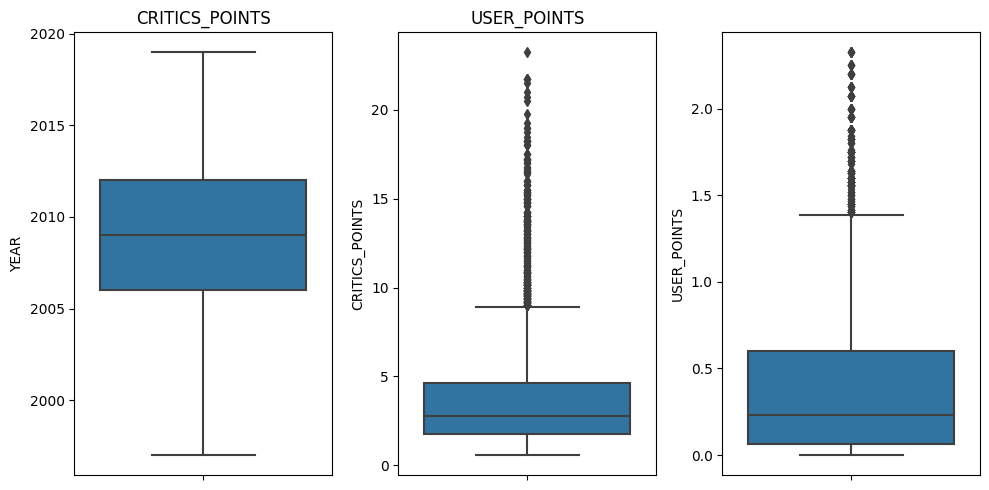

In [56]:
cols = ["YEAR", "CRITICS_POINTS", "USER_POINTS"]
plt.figure(figsize=(10, 5))
for i in range(0, len(cols)):
    plt.title(cols[i])
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=data[cols[i]])
    plt.tight_layout()
plt.show()

**Insights**
- As you can see, There are outliers present in our data (USER_POINTS and CRITICS_POINTS)
- In the next step, we will be removing those outliers


In [57]:
print("Data shape before removing outliers: ", len(data))
outlier_cols = ["USER_POINTS", "CRITICS_POINTS"]

for i in range(0, len(outlier_cols)):
    q1 = data[outlier_cols[i]].quantile(0.25)
    q3 = data[outlier_cols[i]].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # create arrays of boolean values indicating the outlier rows
    upper_array = np.where(data[outlier_cols[i]]>=upper)[0]
    lower_array = np.where(data[outlier_cols[i]] <= lower)[0]

    # Filter the array based on outliers
    data.drop(index=upper_array, inplace=True, errors='ignore')
    data.drop(index=lower_array, inplace=True, errors='ignore')

print("Data shape after removing outliers: ", len(data))

Data shape before removing outliers:  3506
Data shape after removing outliers:  3104


### Visualizing data

Now let's visualize the dataset using different graphs

#### Box Plot

**CATEGORY COLUMN**

Univariate Analysis

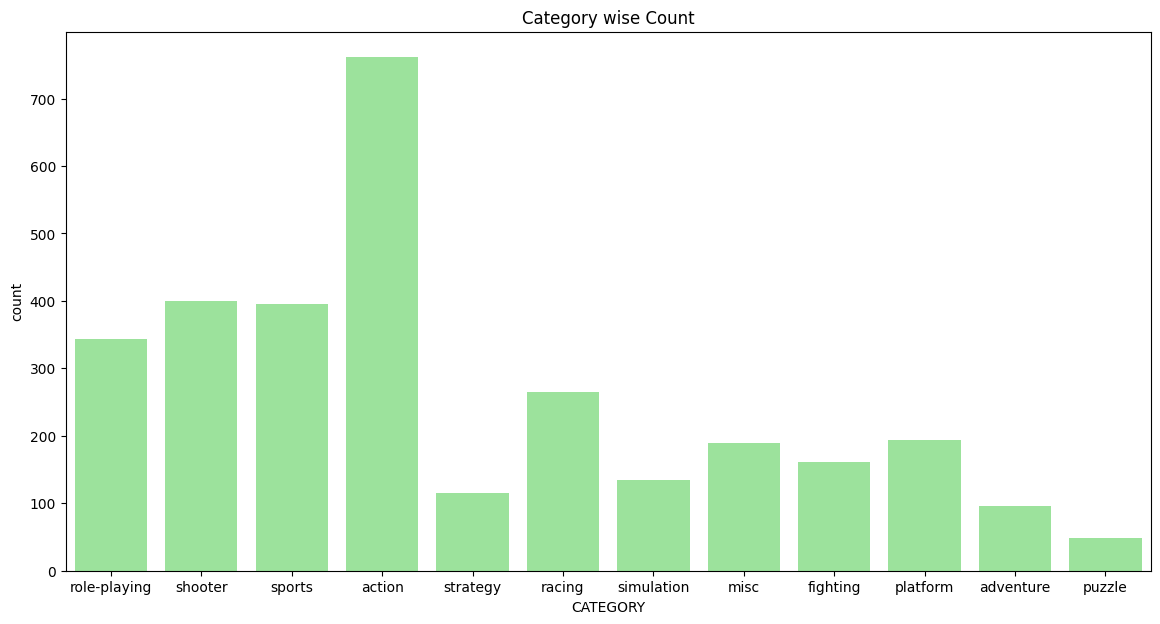

In [58]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x = data["CATEGORY"], color="lightgreen")
plt.title("Category wise Count")
plt.show()

**Insights**
- There is a demand for action games in the market.
- Puzzle games are least played>

BIVARIATE ANALYSIS(How did category has Impact on the Sales)

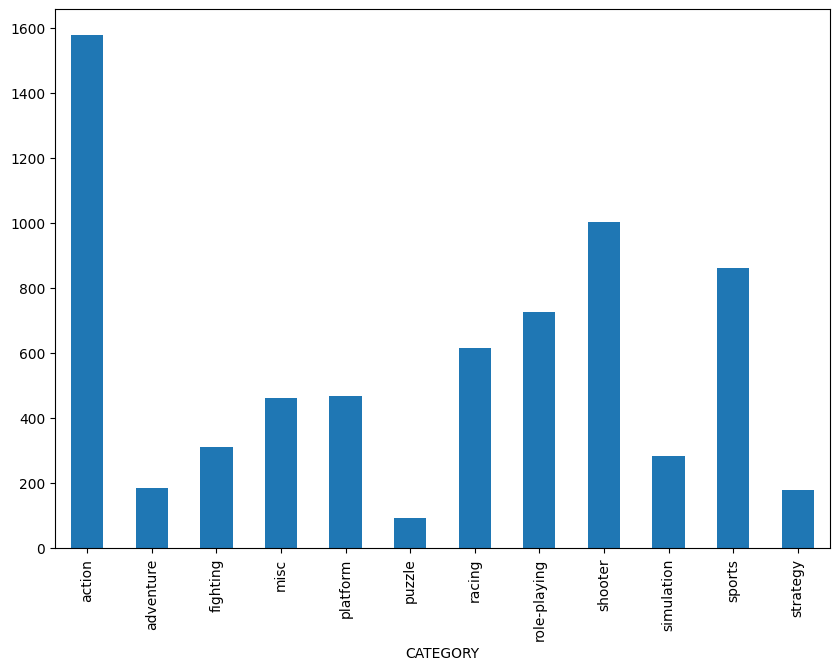

In [59]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby(data["CATEGORY"]).sum()["SalesInMillions"]
grouped_data.plot(kind="bar")
plt.show()

**Insight**
- As expected, Action games generated more sales.
- Shooter and Sports games generated nearly same amount of sales.
- Puzlzle games generated least sales.

**YEAR COLUMN**

Univariate

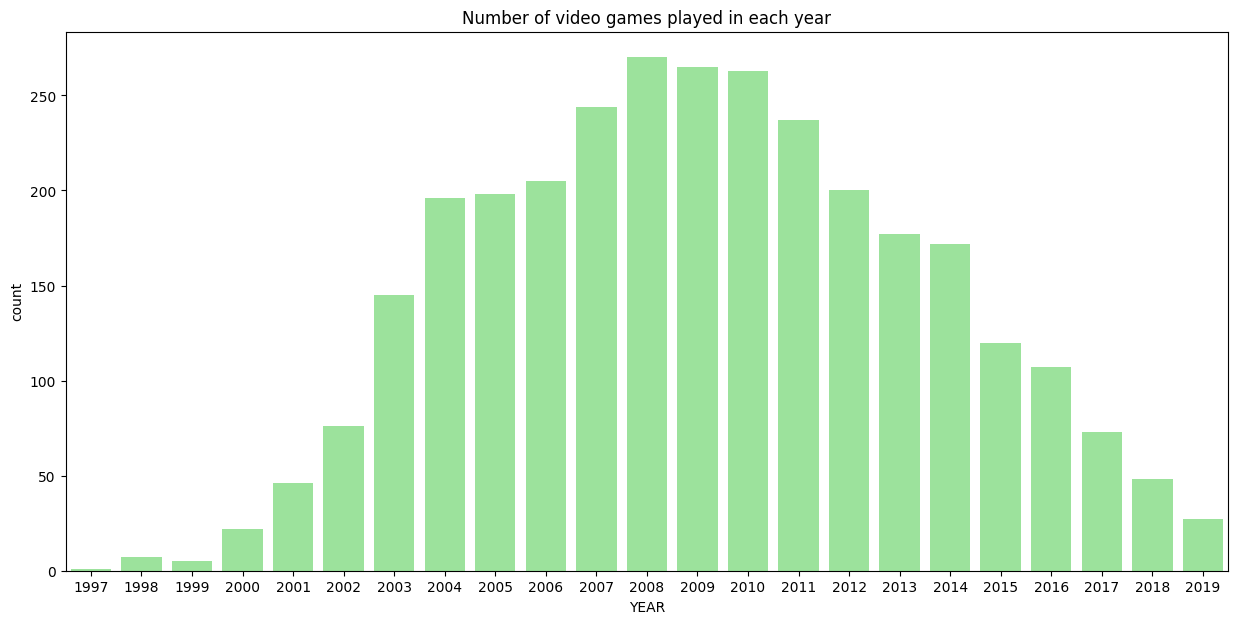

In [60]:
plt.figure(figsize=(15, 7))
sns.countplot(data, x = data["YEAR"], color="lightgreen")
plt.title("Number of video games played in each year")
plt.show()

Bivariate (How does year impact on sales)

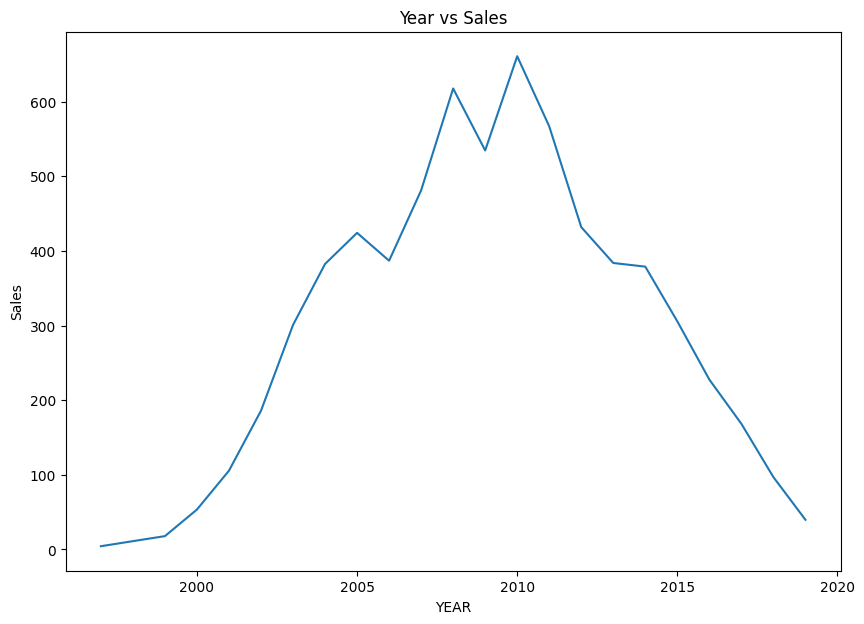

In [61]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby("YEAR").sum()["SalesInMillions"]
plt.ylabel("Sales")
plt.title("Year vs Sales")
grouped_data.plot(kind='line')
plt.show()

**Insights**
- Most number of games are purchased between the years 2007 and 2011 therefore generating more revenue.
- Most number of games are sold in the year 2008
- Then the sales is decreasing probably because of piracy in games.

**PUBLISHER COLUMN**

Univariate

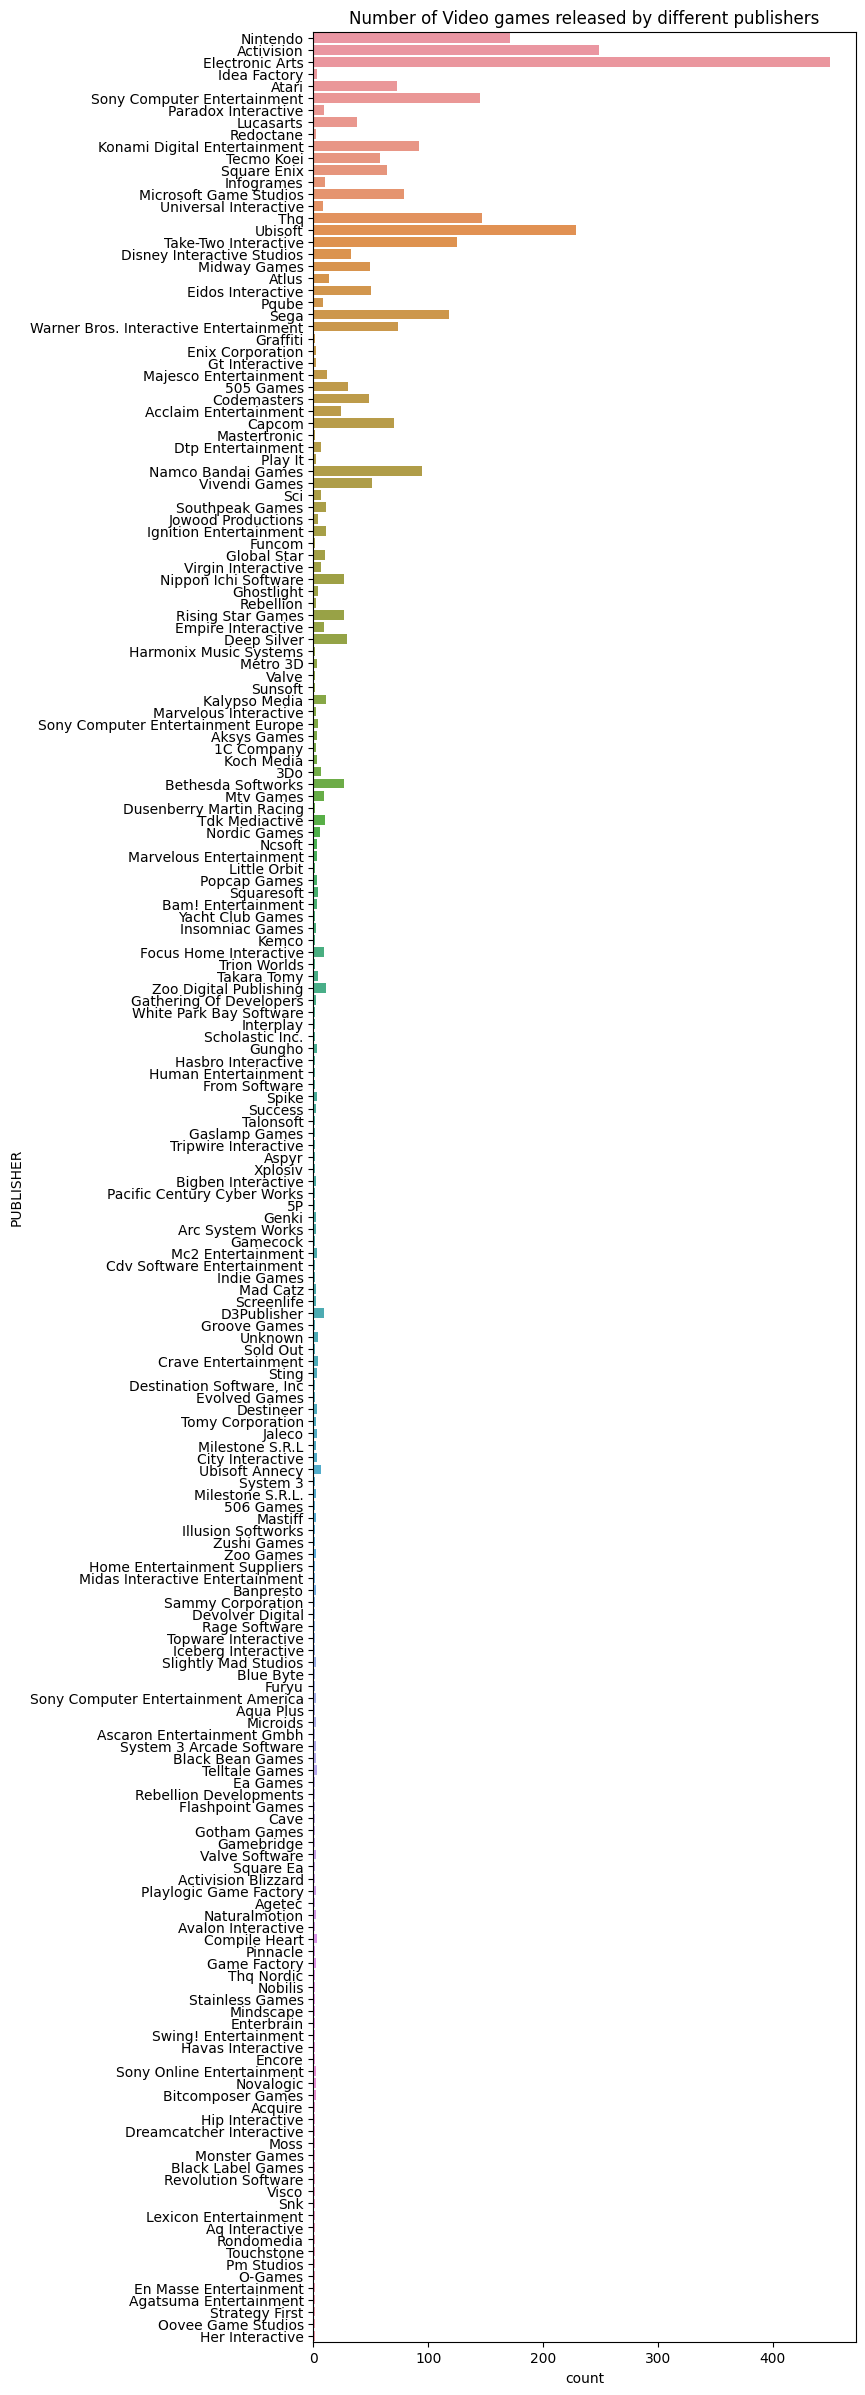

In [62]:
plt.figure(figsize=(7, 30))
sns.countplot(data, y=data["PUBLISHER"], orient="h")
plt.title("Number of Video games released by different publishers")
plt.show()

In [63]:
value_counts = data["PUBLISHER"].value_counts()
# remove all the values which are less than 2 because we get error in one hot encode
for i in range(len(value_counts)):
    if value_counts[i]<=2:
        data = data[data["PUBLISHER"] != value_counts.index[i]]

In [64]:
data["PUBLISHER"].value_counts().index

Index(['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Thq',
       'Sony Computer Entertainment', 'Take-Two Interactive', 'Sega',
       'Namco Bandai Games', 'Konami Digital Entertainment',
       'Microsoft Game Studios', 'Warner Bros. Interactive Entertainment',
       'Atari', 'Capcom', 'Square Enix', 'Tecmo Koei', 'Vivendi Games',
       'Eidos Interactive', 'Midway Games', 'Codemasters', 'Lucasarts',
       'Disney Interactive Studios', '505 Games', 'Deep Silver',
       'Nippon Ichi Software', 'Rising Star Games', 'Bethesda Softworks',
       'Acclaim Entertainment', 'Atlus', 'Majesco Entertainment',
       'Zoo Digital Publishing', 'Southpeak Games', 'Kalypso Media',
       'Ignition Entertainment', 'Tdk Mediactive', 'Global Star', 'Infogrames',
       'Focus Home Interactive', 'Empire Interactive', 'Paradox Interactive',
       'Mtv Games', 'D3Publisher', 'Universal Interactive', 'Pqube',
       'Ubisoft Annecy', '3Do', 'Virgin Interactive', 'Sci',
       'Dtp Entert

Bivariate (How does Publisher impact on sales)

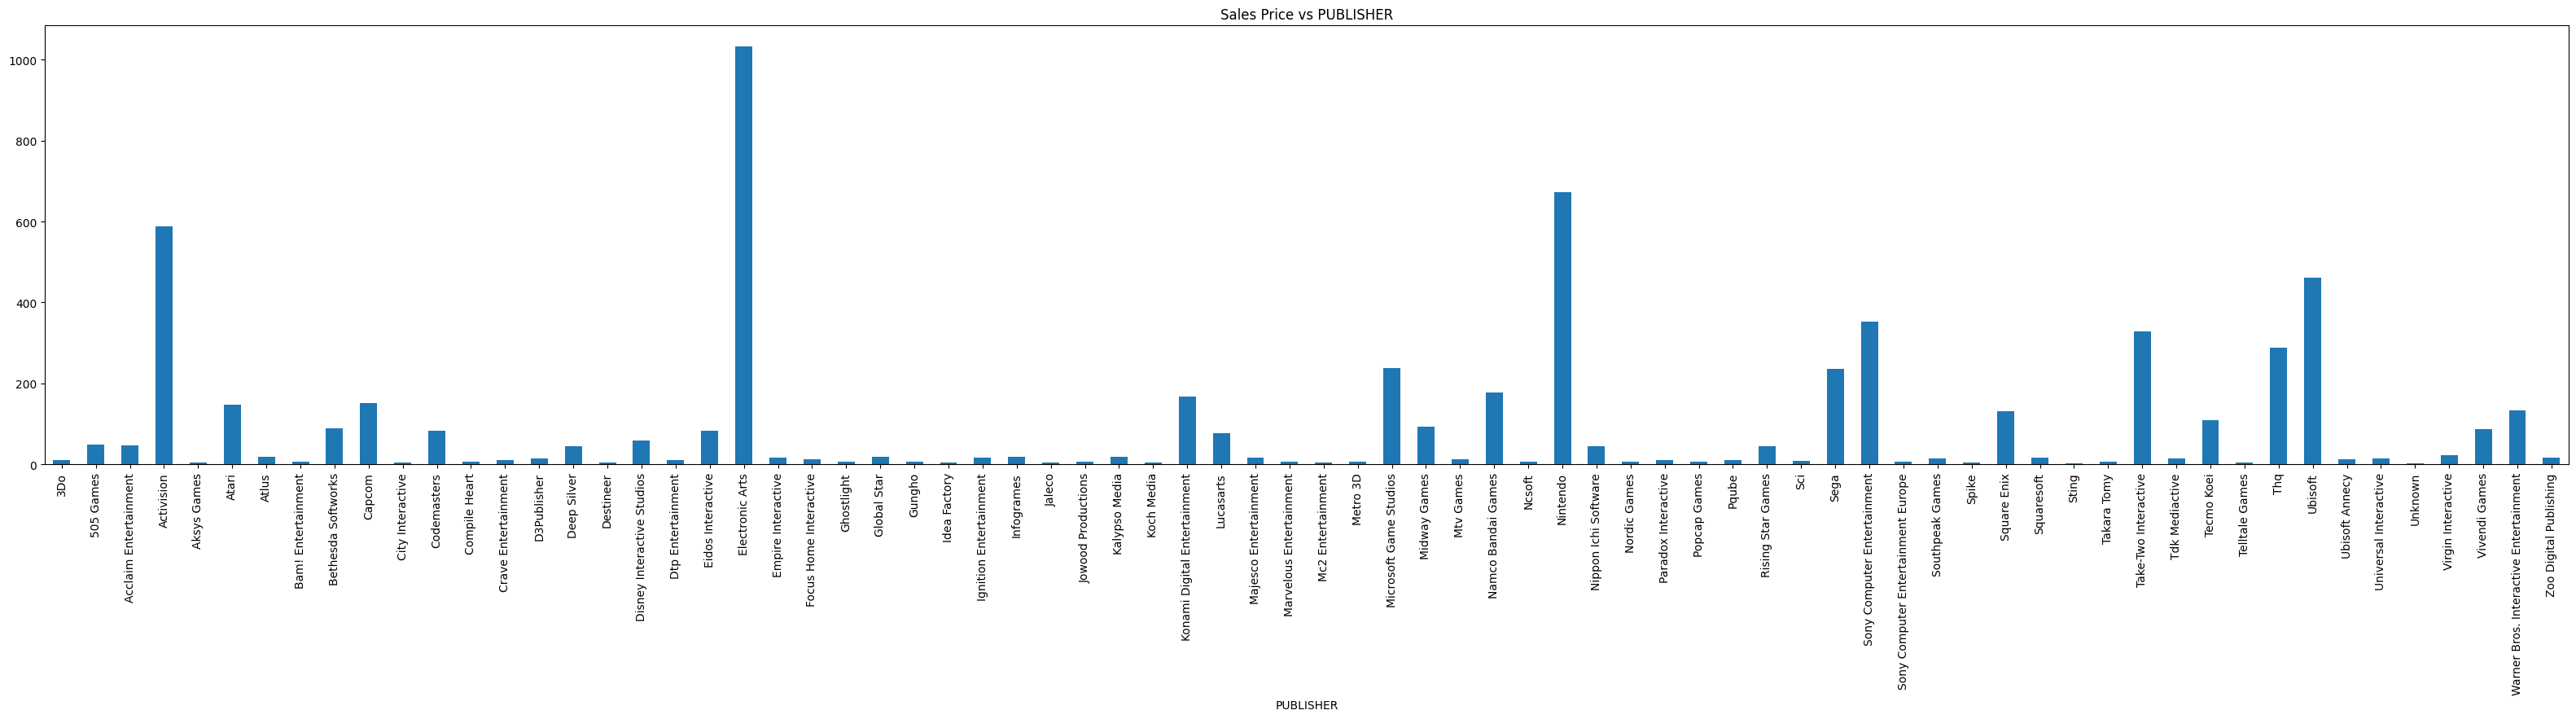

In [65]:
plt.figure(figsize=(40, 7))
grouped_data = data.groupby("PUBLISHER").sum()["SalesInMillions"]
grouped_data.plot(kind='bar')
plt.title("Sales Price vs PUBLISHER")
plt.show()

**Insights**
- Electronic Arts, Activision, Nintendo are the top publishers in the video game industry as they are publishing more games compared to other publishers.
- We see decline in sales of Activision in contrast to remaining two publishers because Activision didn't make the game full online (i.e all game files are present in the server) thus activision games are being pirated. Thus, loss for the publisher.
- So Electronic Arts and Nintendo are the two publishers obtaining most amount of sales.

**RATINGS COLUMN**

Univariate

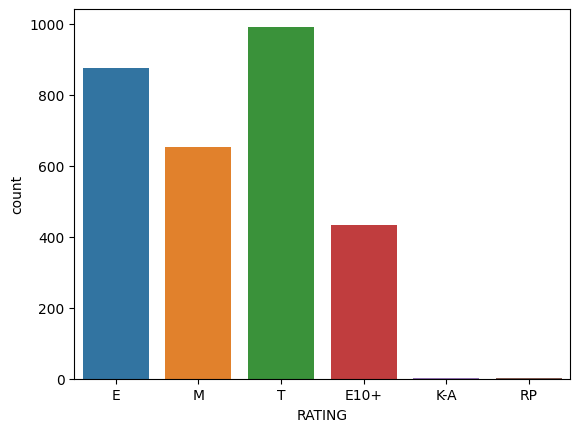

In [66]:

sns.countplot(data, x=data["RATING"])
plt.show()

Bivariate (How does Ratings column effect Sales)

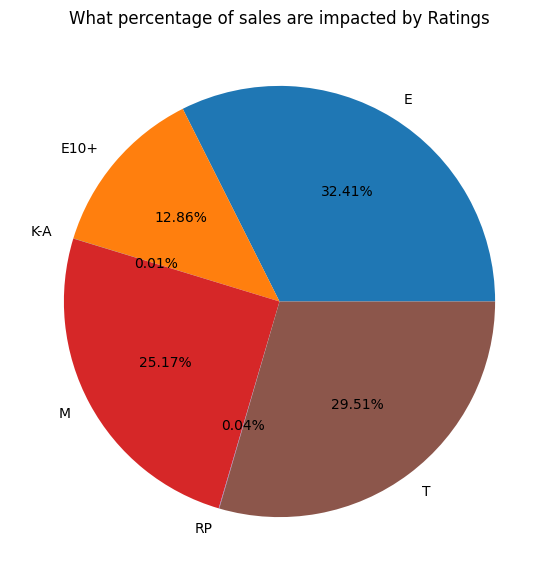

In [67]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby("RATING").sum()["SalesInMillions"]
grouped_data.plot(kind='pie', autopct="%.2f%%")
plt.title("What percentage of sales are impacted by Ratings")
plt.ylabel("")
plt.show()

In the ratings column, 
E - Everyone\
E10+ - Everyone 10+\
M - Mature\
T - Teen\
K.A - Kids to Adults\
RP - Rating Pending

**Insights**

- Teen games and Everyone are purchased more compared to other games.
- As Expected, Teen games and Everyone are generating more revenue.
- K.A games are generating less amount of revenue.

**USER POINTS COLUMN**

Univariate

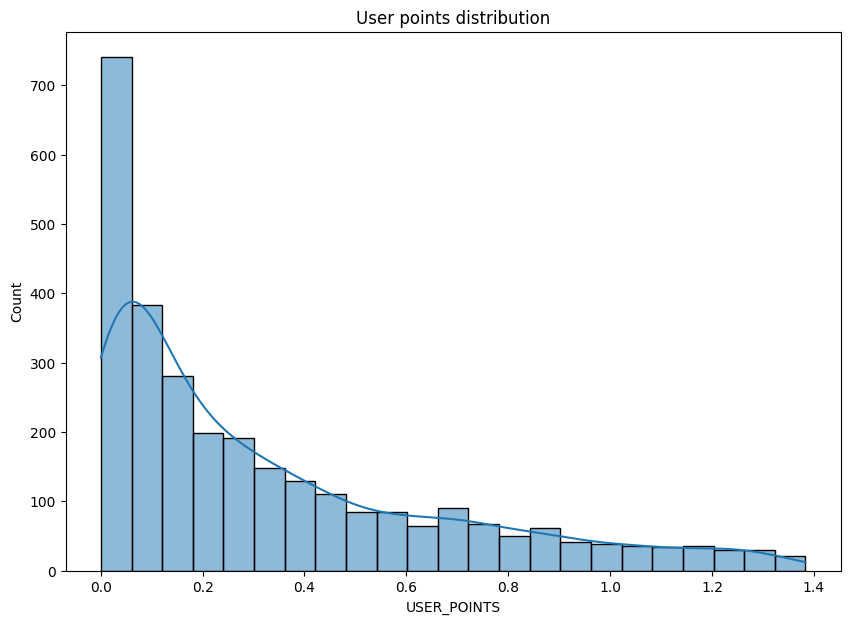

In [68]:
plt.figure(figsize=(10, 7))
sns.histplot(data, x=data["USER_POINTS"], kde=True)
plt.title("User points distribution")
plt.show()

Bivariate (How does User points impact on sales)

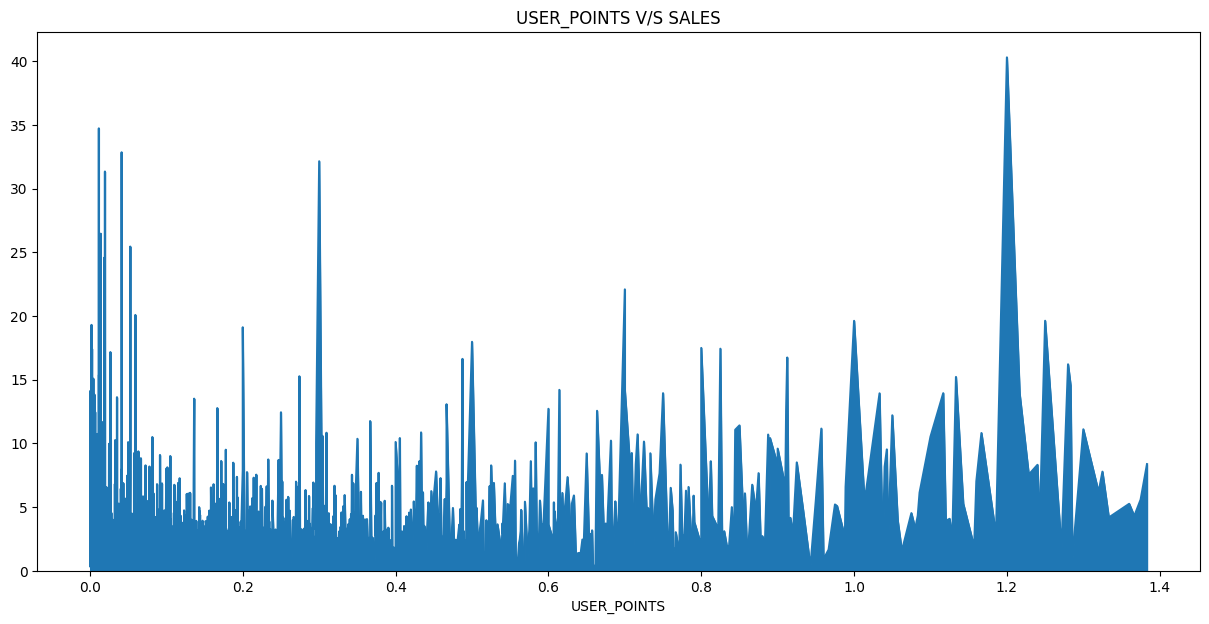

In [69]:
plt.figure(figsize=(15, 7))
grouped_data = data.groupby("USER_POINTS").sum()["SalesInMillions"]
plt.title("USER_POINTS V/S SALES")
grouped_data.plot(kind="area")
plt.show()

**CRITICS_POINTS COLUMN**

Univariate

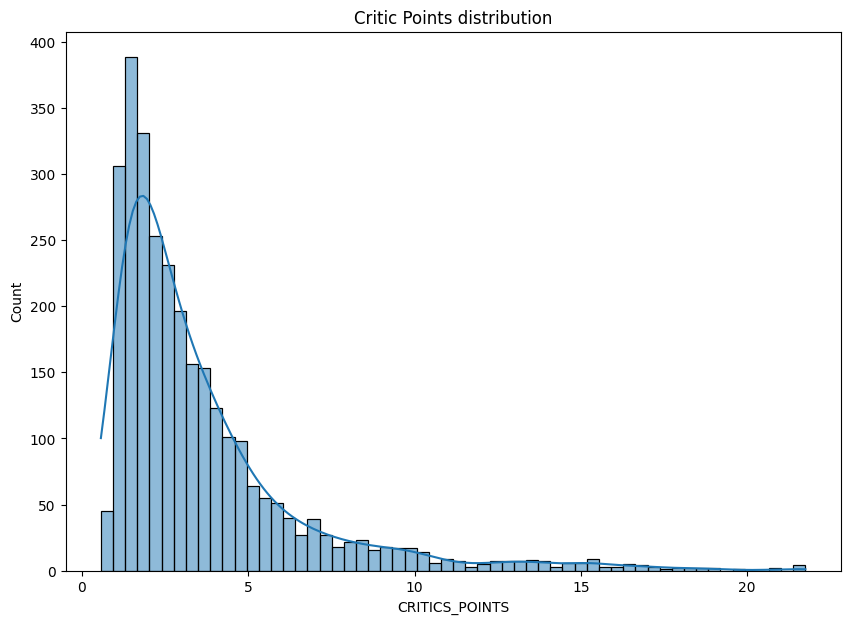

In [70]:
plt.figure(figsize=(10, 7))
sns.histplot(data, x=data["CRITICS_POINTS"], kde=True)
plt.title("Critic Points distribution")
plt.show()

Bivariate (How critics points impacts sales)

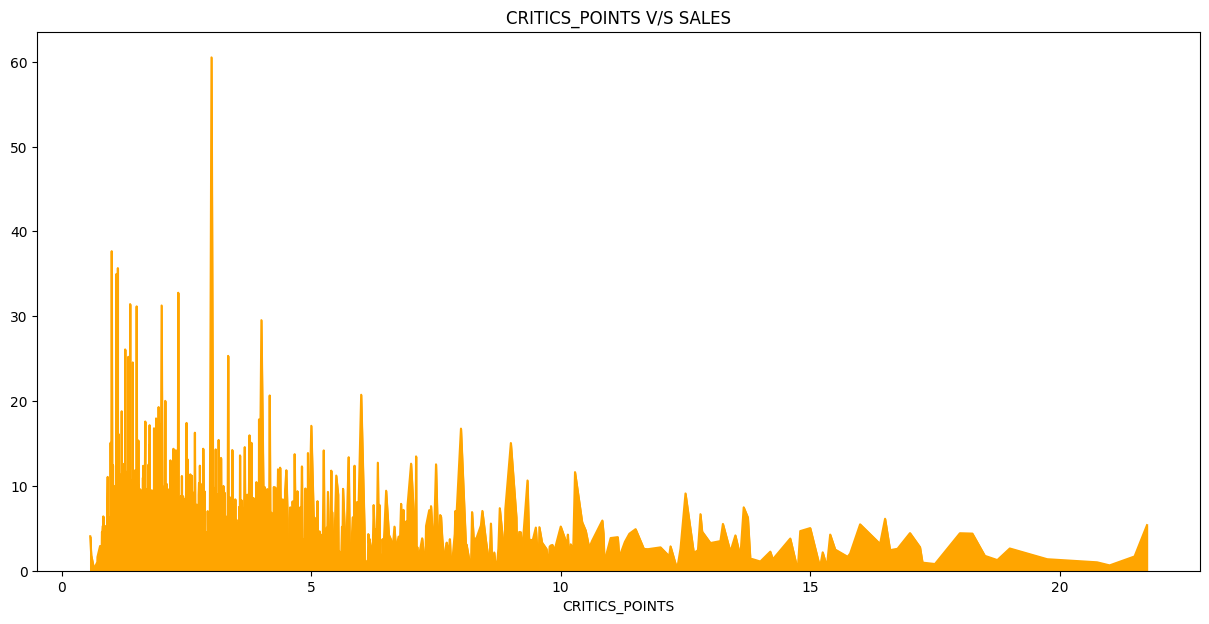

In [71]:
plt.figure(figsize=(15, 7))

grouped_data = data.groupby("CRITICS_POINTS").sum()["SalesInMillions"]
grouped_data.plot(kind="area", color="orange")
plt.title("CRITICS_POINTS V/S SALES")
plt.ylabel("")
plt.show()

### Correlation

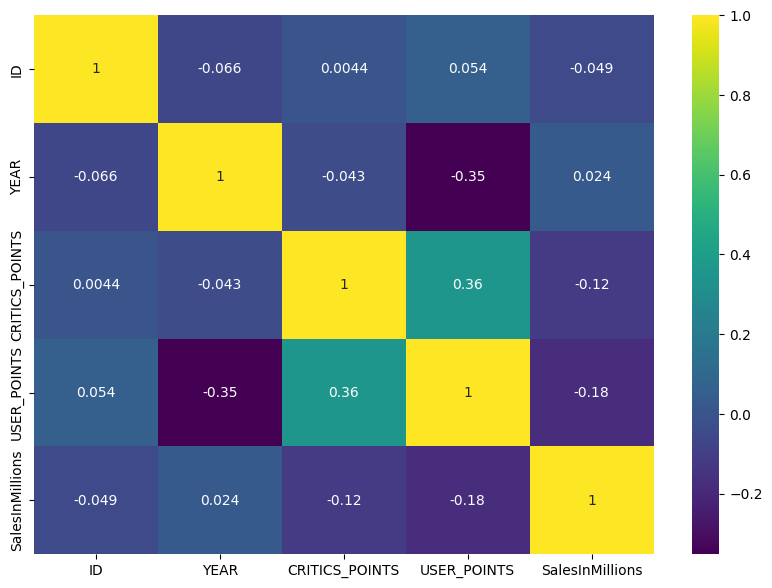

In [72]:
plt.figure(figsize=(10, 7))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

**Export clean dataset to the folder**

In [73]:
data.shape

(2953, 9)

In [74]:
data.to_csv('../data/data_cleaned.csv', index=False, header=True)